## Importing the necessary libraries

In [111]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [112]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1513153,4,2175322932,Mon Jun 15 00:40:09 PDT 2009,NO_QUERY,AllegedLeigh,@karl_lurman oh yeah dude I keep meaning to se...
1565349,4,2187527105,Mon Jun 15 20:24:50 PDT 2009,NO_QUERY,Xxambee11xX,playing pianoo thinks im gonna watch a moviee
740176,0,2265926213,Sun Jun 21 07:34:36 PDT 2009,NO_QUERY,mardetanha,http://bit.ly/2cSPOk you can see who sabotag...
1052111,4,1961299451,Fri May 29 09:17:19 PDT 2009,NO_QUERY,lauram68,@angelajames aw shucks! how are you tweeting? ...
681149,0,2249667996,Fri Jun 19 22:46:38 PDT 2009,NO_QUERY,lilmissrandomme,does not like this idea at all!!! How am I sup...


## Preview of Dataset

In [113]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [129]:
data=df[['text','target']]
data = shuffle(data)
len(data)

1600000

In [115]:
data['target'] = data['target'].replace(4,1)

/Users/abhishekshinde/Desktop/sample_project/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [117]:
data_pos = data_pos.iloc[:int(100000)]
data_neg = data_neg.iloc[:int(100000)]

In [118]:
from sklearn.utils import shuffle

dataset = pd.concat([data_pos, data_neg])
dataset = shuffle(dataset)
len(dataset)

200000

In [119]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

6083              having a really hard time focusing today 
897759    @misscocoaluv @shaynad sisters, when is the ne...
807916    @diablopooch happy birthday (for monday). than...
90372     this is the first mother's day ever i have not...
872688      @nikabok thanks nik  your tees are in the mail 
Name: text, dtype: object

## List of Stopwords

#### Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 

In [120]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

## Removing the stopwords from data

#### In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

In [121]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

804849                            3 days shall blonde whoop
839521    @charlotte_xoxo oh yeah saw tht showed 17 plan...
869265      @suzeormanshow yes miss suze, wonderful weekend
23341     @iwillbot you're cute love you, tried learn pi...
11412     wishing working outside instead stuck inside. ...
Name: text, dtype: object

### Removing punctuations from data

In [122]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

6083                        really hard time focusing today
897759    misscocoaluv shaynad sisters next divas lounge...
807916    diablopooch happy birthday for monday thanks c...
90372                  first mothers day ever not spent mom
872688                         nikabok thanks nik tees mail
Name: text, dtype: object

### Removing repeating characters

In [123]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

6083                        really hard time focusing today
897759    misscocoaluv shaynad sisters next divas lounge...
807916    diablopooch happy birthday for monday thanks c...
90372                  first mothers day ever not spent mom
872688                         nikabok thanks nik tees mail
Name: text, dtype: object

### Removing URL's

In [124]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

6083                        really hard time focusing today
897759    misscocoaluv shaynad sisters next divas lounge...
807916    diablopooch happy birthday for monday thanks c...
90372                  first mothers day ever not spent mom
872688                         nikabok thanks nik tees mail
Name: text, dtype: object

### Removing numbers 

In [125]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

6083                        really hard time focusing today
897759    misscocoaluv shaynad sisters next divas lounge...
807916    diablopooch happy birthday for monday thanks c...
90372                  first mothers day ever not spent mom
872688                         nikabok thanks nik tees mail
Name: text, dtype: object

## Tokenizing

splitting a string, text into a list of tokens. (A single word is represented as one token)

In [126]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

804849          [w]
839521       [w, w]
869265    [w, w, w]
23341           [w]
11412        [w, w]
Name: text, dtype: object

## Stemming

suffixes like “-ed” and “-ing” are removed<br>
words are converted to there word stem. (pythoning) -> (python), (coding) -> (code)

In [127]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

804849          [w]
839521       [w, w]
869265    [w, w, w]
23341           [w]
11412        [w, w]
Name: text, dtype: object

In [130]:
X=data.text
y=data.target

In [131]:
lovato Im not coming to your show  i # Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =66)

### TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency.
### This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. 

In [132]:
X_train

579120     @ddlovato Im not coming to your show  i live i...
899921     @chewysun Kristi. I say this because I love yo...
748004     Now I understand why he was going so hard abou...
1276629          @debbylovespr awe thanks sweetness    &lt;3
737204     @roblegon Ah damn! i missed out!  lol ah cool ...
                                 ...                        
160349                                 @Moss1982 bad times? 
72398                       ps why aren't i sleeping yet?!? 
703516                            Do not like this plotline 
953276     Im so excited! @allyeska and her bf @nathanael...
1502385    Countdown to my birthday  Dinner tonight with ...
Name: text, Length: 1520000, dtype: object

In [133]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


#### Number of features in each text is 500,000

In [134]:
x = 100000
vectoriser.get_feature_names()[x:x+100]

['dainiesaur',
 'dainty',
 'daintydoll',
 'daiquiri',
 'daiquiris',
 'dairy',
 'dairy and',
 'dairy bar',
 'dairy free',
 'dairy milk',
 'dairy no',
 'dairy products',
 'dairy queen',
 'dairy queens',
 'dairylea',
 'daises',
 'daisies',
 'daisies and',
 'daisies can',
 'daisies episode',
 'daisies episodes',
 'daisies finale',
 'daisies is',
 'daisies it',
 'daisies last',
 'daisies on',
 'daisies quot',
 'daisies so',
 'daisies tonight',
 'daisies was',
 'daisy',
 'daisy and',
 'daisy chains',
 'daisy dukes',
 'daisy is',
 'daisy of',
 'daisy she',
 'daisybruce',
 'daisychainbaby',
 'daisyduhh',
 'daisydukelba',
 'daisyhatestwitt',
 'daisyjanie',
 'daisyjanine',
 'daisykary',
 'daisyoflove',
 'daisypoppets',
 'daisypops',
 'daisyreyes',
 'daisyrjordan',
 'daisys',
 'daisyvega',
 'daisyx',
 'daivrawks',
 'daizz26',
 'dajbelshaw',
 'dajmin',
 'dak',
 'dak04',
 'dakcyrus',
 'dakidd_breeze',
 'daking240',
 'dakota',
 'dakota but',
 'dakota fanning',
 'dakota is',
 'dakotaafanning',
 'dako

In [135]:
# save_word_features = open("updated_ver2_models/word_features500k.pickle","wb")
# pickle.dump(vectoriser.get_feature_names(), save_word_features)
# save_word_features.close()

In [136]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [137]:
# save_vectoriser = open("updated_ver2_models/vectoriser.pickle","wb")
# pickle.dump(vectoriser, save_vectoriser)
# save_vectoriser.close()

In [138]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     40044
           4       0.80      0.81      0.80     39956

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



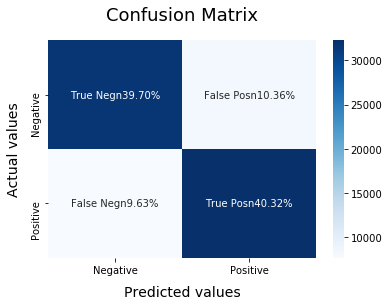

In [140]:
# Bernoulli naive bayes

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
# save_classifier = open("updated_ver2_models/BNB.pickle","wb")
# pickle.dump(BNBmodel, save_classifier)
# save_classifier.close()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



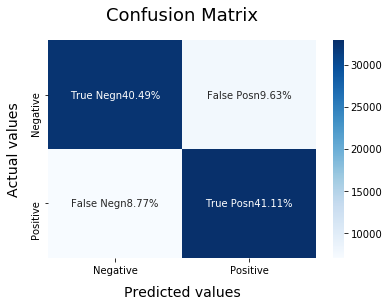

In [56]:
# Support Vector Classifiery

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [57]:
# save_classifier = open("updated_ver2_models/SVC.pickle","wb")
# pickle.dump(SVCmodel, save_classifier)
# save_classifier.close()

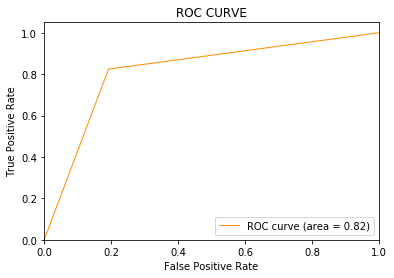

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



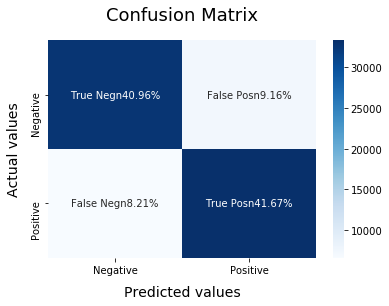

In [59]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [60]:
# save_classifier = open("updated_ver2_models/LR.pickle","wb")
# pickle.dump(LRmodel, save_classifier)
# save_classifier.close()

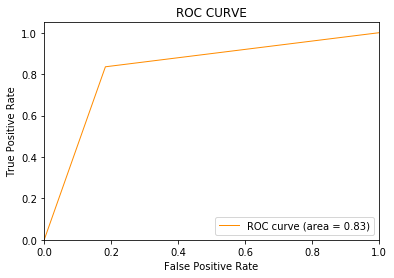

In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [62]:
X_train.shape

(1520000, 500000)

In [48]:
X_train[0]

<1x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [49]:
X[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [55]:
BNBmodel.predict(vectoriser.transform([X[0]]))[0]

0

In [54]:
vectoriser.transform([X[0]])

<1x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [67]:
from nltk.classify import ClassifierI
from statistics import mode
from sklearn.metrics import accuracy_score

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.predict(features)
            votes.append(v[0])
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.predict(features)
            votes.append(v[0])

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    
voted_classifier = VoteClassifier(LRmodel, SVCmodel, BNBmodel)

# y_pred = voted_classifier.classify(X_test)
# accuracy_score(y_test, y_pred)

In [65]:
y_pred = []
for i in X_test:
    
    y_pred.append(voted_classifier.classify(i))
y_pred

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,


In [66]:
accuracy_score(y_test, y_pred)

0.8242625